In [1]:
import datetime as dt

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
days_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

## Import & transform dataset

In [4]:
df = pd.read_csv("data.csv")

In [5]:
df.head(5)

,moderator,id_request,request_time,start_time,finish_time,team
0,165,159660,2020-09-24 7:01:16,2020-10-01 16:00:31,2020-10-01 16:02:02,retail
1,178,160116,2020-09-24 22:32:15,2020-10-01 13:21:42,2020-10-01 13:21:43,retail
2,187,160178,2020-09-25 2:58:13,2020-10-02 11:37:16,2020-10-02 11:41:56,wholesale
3,178,160306,2020-09-25 9:44:12,2020-10-02 7:23:09,2020-10-02 7:25:33,retail
4,178,163042,2020-09-30 15:56:08,2020-10-02 7:37:33,2020-10-02 7:47:57,retail


In [6]:
print(f'Rows: {len(df)}')

Rows: 35617


In [7]:
print(f'Duplicated id_request: {len(df[df["id_request"].duplicated()])}')

Duplicated id_request: 0


In [8]:
print(f'Unique teams: {df["team"].unique()}')

Unique teams: ['retail' 'wholesale']


In [9]:
print('Check intersection for retail and wholesale teams:')
print(list(set(df[df["team"] == "retail"]["moderator"].unique()) & set(df[df["team"] == "wholesale"]["moderator"].unique())))

Check intersection for retail and wholesale teams:
[]


In [10]:
print("Retail team: ", len(df[df["team"] == "retail"]["moderator"].unique()))
print("Wholesale team: ", len(df[df["team"] == "wholesale"]["moderator"].unique()))

Retail team:  24
Wholesale team:  25


In [11]:
print(f'Time gap for dataset: \nfirst - {df['request_time'].min()} \nlast - {df['request_time'].max()}')

Time gap for dataset: 
first - 2020-09-24 22:32:15 
last - 2020-12-31 9:57:18


In [12]:
df["request_time"] = pd.to_datetime(df["request_time"])
df["start_time"] = pd.to_datetime(df["start_time"])
df["finish_time"] = pd.to_datetime(df["finish_time"])

In [13]:
df["time_to_proccess"] = df["start_time"] - df["request_time"]
df["processing_time"] = df["finish_time"] - df["start_time"]

In [14]:
#Create columns with a time of preprocessing and processing requests in minutes
df["time_to_proccess_min"] = df["time_to_proccess"].apply(lambda x: x.total_seconds() / 60)
df["processing_time_min"] = df["processing_time"].apply(lambda x: x.total_seconds() / 60)

In [15]:
df.drop(["time_to_proccess","processing_time"], inplace=True, axis=1)

In [16]:
df.head()

,moderator,id_request,request_time,start_time,finish_time,team,time_to_proccess_min,processing_time_min
0,165,159660,2020-09-24 07:01:16,2020-10-01 16:00:31,2020-10-01 16:02:02,retail,10619.250000,1.516667
1,178,160116,2020-09-24 22:32:15,2020-10-01 13:21:42,2020-10-01 13:21:43,retail,9529.450000,0.016667
2,187,160178,2020-09-25 02:58:13,2020-10-02 11:37:16,2020-10-02 11:41:56,wholesale,10599.050000,4.666667
3,178,160306,2020-09-25 09:44:12,2020-10-02 07:23:09,2020-10-02 07:25:33,retail,9938.950000,2.400000
4,178,163042,2020-09-30 15:56:08,2020-10-02 07:37:33,2020-10-02 07:47:57,retail,2381.416667,10.400000


# EDA

_We can see that the requests from September were pending and only began being processed in October. We can assume that in September there was a test launch of the product, and the support team started working in October, or that the requests were not processed on time and were carried over to the next working days._

_We will check if there are still cases where more than a day passed between the creation of the request and its processing._

In [17]:
df["from_request_to_start_days"] = df["start_time"] - df["request_time"]

In [18]:
mask = df["from_request_to_start_days"].apply(lambda x: x > dt.timedelta(days=1))
df_late_processed = df[mask]

**Requests taken into processing one day or more after creation**

In [19]:
df_late_processed.head(5)

,moderator,id_request,request_time,start_time,finish_time,team,time_to_proccess_min,processing_time_min,from_request_to_start_days
0,165,159660,2020-09-24 07:01:16,2020-10-01 16:00:31,2020-10-01 16:02:02,retail,10619.250000,1.516667,7 days 08:59:15
1,178,160116,2020-09-24 22:32:15,2020-10-01 13:21:42,2020-10-01 13:21:43,retail,9529.450000,0.016667,6 days 14:49:27
2,187,160178,2020-09-25 02:58:13,2020-10-02 11:37:16,2020-10-02 11:41:56,wholesale,10599.050000,4.666667,7 days 08:39:03
3,178,160306,2020-09-25 09:44:12,2020-10-02 07:23:09,2020-10-02 07:25:33,retail,9938.950000,2.400000,6 days 21:38:57
4,178,163042,2020-09-30 15:56:08,2020-10-02 07:37:33,2020-10-02 07:47:57,retail,2381.416667,10.400000,1 days 15:41:25


In [20]:
mask = df["from_request_to_start_days"].apply(lambda x: x < dt.timedelta(days=1))
df_properly_processed = df[mask]

In [21]:
df_properly_processed.head(5)

,moderator,id_request,request_time,start_time,finish_time,team,time_to_proccess_min,processing_time_min,from_request_to_start_days
5,128,163426,2020-10-01 00:58:24,2020-10-01 07:07:31,2020-10-01 07:08:22,wholesale,369.116667,0.850000,0 days 06:09:07
6,128,163427,2020-10-01 01:02:20,2020-10-01 08:03:58,2020-10-01 08:06:52,wholesale,421.633333,2.900000,0 days 07:01:38
7,128,163428,2020-10-01 01:04:15,2020-10-01 07:09:57,2020-10-01 07:12:06,wholesale,365.700000,2.150000,0 days 06:05:42
8,128,163429,2020-10-01 01:07:15,2020-10-01 07:12:06,2020-10-01 07:13:15,wholesale,364.850000,1.150000,0 days 06:04:51
9,128,163431,2020-10-01 01:14:13,2020-10-01 07:16:04,2020-10-01 07:17:05,wholesale,361.850000,1.016667,0 days 06:01:51


_The time from the creation of a request to the start of work on it can exceed 7 hours — next, we will check in which teams this occurs._

In [22]:
del df["from_request_to_start_days"]

In [23]:
print("Requests which were processed in the same day:", len(df_properly_processed))
print("Requests which were processed with more than 1 day delay:", len(df_late_processed))

Requests which were processed in the same day: 19534
Requests which were processed with more than 1 day delay: 16083


**We see that 45% of all requests were processed more than a day after they were created.** 

In [24]:
df_late_processed.groupby("team")["id_request"].count()

team
retail         279
wholesale    15804
Name: id_request, dtype: int64

In [25]:
df.groupby("team")["id_request"].count()

team
retail       14025
wholesale    21592
Name: id_request, dtype: int64

**Percentage of requests processed with a delay:**  
**- retail 2%**  
**- wholesale 73%**

_This means that the wholesale support team has significant delays in processing requests._

_We will check when the support agents started working and whether both teams were fully staffed at the start of the quarter._

In [26]:
employers_first_day = df[["team","moderator", "start_time"]].groupby(["team","moderator"])["start_time"].min()

In [27]:
employers_first_day = employers_first_day.reset_index() 
employers_first_day["year-month-day"] = employers_first_day["start_time"].dt.to_period('D')

In [28]:
employers_first_day[employers_first_day["start_time"] > "2020-10-05"]

,team,moderator,start_time,year-month-day
0,retail,109,2020-10-30 10:29:54,2020-10-30
2,retail,111,2020-10-05 08:59:14,2020-10-05
6,retail,133,2020-10-09 11:07:28,2020-10-09
7,retail,134,2020-10-07 11:05:37,2020-10-07
12,retail,148,2020-10-17 07:36:04,2020-10-17
13,retail,150,2020-10-09 12:08:47,2020-10-09
15,retail,156,2020-10-05 11:52:36,2020-10-05
16,retail,164,2020-10-07 07:09:17,2020-10-07
21,retail,176,2020-10-07 09:59:50,2020-10-07
24,wholesale,102,2020-11-16 12:42:15,2020-11-16


**Only these moderators started working later than the others — I assume they were hired later.
Since most members of both teams began processing requests in October, we can reject the assumption that the delays in the wholesale team were due to a lack of staff.** 

_We assume that the late processing of requests may be related to the workload of the wholesale department._

_We will check the number of requests in September to determine how important this information is._

In [29]:
df['request_time_year_month'] = df['request_time'].dt.to_period('M')
df['start_time_year_month'] = df['request_time'].dt.to_period('M')

In [30]:
df.groupby(['team', 'request_time_year_month'])["id_request"].count()

team       request_time_year_month
retail     2020-09                        4
           2020-10                     3263
           2020-11                     4310
           2020-12                     6448
wholesale  2020-09                        1
           2020-10                     2141
           2020-11                     6384
           2020-12                    13066
Name: id_request, dtype: int64

**For further analysis, we will only use data from the last quarter of 2020, since the data for a few days in September is not representative.**

In [31]:
df_q4 = df[df["request_time_year_month"] >= "2020-10"]

__Before calculating the actual response time relative to the expected one, we need to check the working hours of the moderators and find out why some requests are taken into processing several days after their creation.__  

_For the analysis, we will select a time period in which the workload for both teams was at a normal level._

_Let’s look at how many requests are received weekly during Q4 to select a representative week._

In [32]:
df_q4["week"] = df_q4["start_time"].dt.isocalendar().week

In [33]:
requests_weekly_retail = df_q4[df_q4["team"] == "retail"].groupby("week")["id_request"].count().reset_index()
requests_weekly_wholesale = df_q4[df_q4["team"] == "wholesale"].groupby("week")["id_request"].count().reset_index()

requests_weekly = pd.merge(requests_weekly_retail,requests_weekly_wholesale, on = "week")
requests_weekly.rename(columns={"id_request_x": "retail", "id_request_y": "wholesale"}, inplace = True)

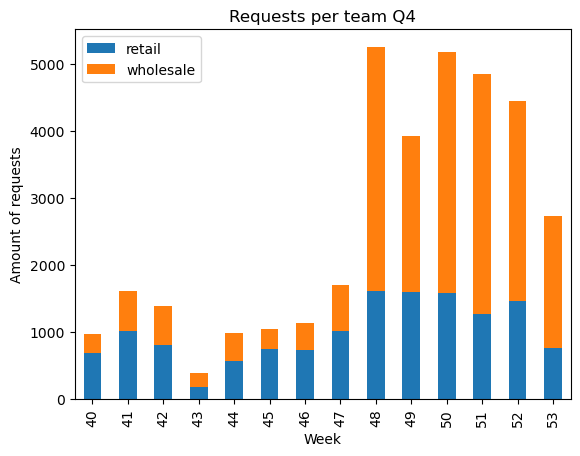

In [34]:
requests_weekly.plot(x = "week", y = ["retail", "wholesale"], kind = "bar", stacked=True)
plt.title("Requests per team Q4")
plt.xlabel("Week")
plt.ylabel("Amount of requests")
plt.show()

_We can see that the workload increases from week 48 of 2020, which corresponds to the week of Black Friday.
The following week after Black Friday is not as busy compared to the peak weeks, but the request volume still remains elevated.
Until the end of the year, the workload for the teams remains high, likely due to the winter holidays._

_For a comparative analysis of the teams’ working schedules, we could initially consider week 41 (October 5–11, 2020). However, given that at the beginning of October, 14 employees processed requests for the first time, it is likely that these were new hires._
  
**For further analysis, we have selected week 47, when the team was already fully staffed and had been working for some time.**

_But before that, let’s look at when exactly the delays in processing requests occur — whether the requests are processed slowly by the moderator or are simply waiting too long before being assigned to a moderator._

# Metric

In [35]:
monthly_counts_retail = df_q4[df_q4["team"] == "retail"].groupby('request_time_year_month')['id_request'].count()
monthly_counts_wholesale = df_q4[df_q4["team"] == "wholesale"].groupby('request_time_year_month')['id_request'].count()

monthly_counts_retail_time_to_process = df_q4[df_q4["team"] == "retail"].groupby('request_time_year_month')['time_to_proccess_min'].mean()
monthly_counts_wholesale_time_to_process = df_q4[df_q4["team"] == "wholesale"].groupby('request_time_year_month')['time_to_proccess_min'].mean()

monthly_counts_retail_processing_time_min = df_q4[df_q4["team"] == "retail"].groupby('request_time_year_month')['processing_time_min'].mean()
monthly_counts_wholesale_processing_time_min = df_q4[df_q4["team"] == "wholesale"].groupby('request_time_year_month')['processing_time_min'].mean()

In [36]:
print("Retail")
print("\nmonthly_counts_retail:", monthly_counts_retail)
print("\nmonthly_counts_retail_time_to_process:", monthly_counts_retail_time_to_process)
print("\nmonthly_counts_retail_processing_time_min:", monthly_counts_retail_processing_time_min)

Retail

monthly_counts_retail: request_time_year_month
2020-10    3263
2020-11    4310
2020-12    6448
Freq: M, Name: id_request, dtype: int64

monthly_counts_retail_time_to_process: request_time_year_month
2020-10    2078.597926
2020-11     209.111756
2020-12     125.310026
Freq: M, Name: time_to_proccess_min, dtype: float64

monthly_counts_retail_processing_time_min: request_time_year_month
2020-10    1.848207
2020-11    1.983480
2020-12    2.037379
Freq: M, Name: processing_time_min, dtype: float64


In [37]:
print("Wholesale")
print("\nnmonthly_counts_wholesale:",monthly_counts_wholesale)
print("\nmonthly_counts_wholesale_time_to_process:",monthly_counts_wholesale_time_to_process)
print("\nmonthly_counts_wholesale_processing_time_min:",monthly_counts_wholesale_processing_time_min)

Wholesale

nmonthly_counts_wholesale: request_time_year_month
2020-10     2141
2020-11     6384
2020-12    13066
Freq: M, Name: id_request, dtype: int64

monthly_counts_wholesale_time_to_process: request_time_year_month
2020-10    3359.625354
2020-11    1692.620708
2020-12    4698.853276
Freq: M, Name: time_to_proccess_min, dtype: float64

monthly_counts_wholesale_processing_time_min: request_time_year_month
2020-10    3.165561
2020-11    2.458487
2020-12    2.271682
Freq: M, Name: processing_time_min, dtype: float64


In [38]:
print("% retail requests:", monthly_counts_retail.values.sum()/ df['id_request'].count())
print("% wholesale requests:",monthly_counts_wholesale.values.sum()/ df['id_request'].count())

% retail requests: 0.3936603307409383
% wholesale requests: 0.6061992868573995


_We can see that in terms of processing time, both teams meet the manager’s requirement of completing the request within 15 minutes._  
_However, the time to take a request into processing differs significantly from the desired target of 5 minutes._

**Let’s see what percentage of requests are processed on time — within the acceptable time frame (up to 45 minutes for request processing) and within the desired time frame (up to 15 minutes). We will also look at how long it takes from the moment a request appears to when it is taken into processing (acceptable time — up to 5 minutes from the moment the request appears).**

Definition of KPI for moderators and comparison with actual data

- Excellent KPI: time to take into processing ≤ 5 minutes and processing time ≤ 15 minutes

- Acceptable KPI: time to take into processing ≤ 5 minutes and processing time ≤ 45 minutes

- Poor KPI: time to take into processing ≥ 5 minutes and processing time > 45 minutes

The analysis is carried out for all requests within the team.

According to the information above, we can define all possible scenarios:

- Request taken into processing within ≤ 5 minutes from appearance and processed in ≤ 15 minutes — excellent

- Request taken into processing within ≤ 5 minutes from appearance and processed in (15 min; 45 min] — acceptable

- Request taken into processing in > 5 minutes from appearance and processed in ≤ 15 minutes — late to start but excellent processing speed

- Request taken into processing in > 5 minutes from appearance and processed in > 45 minutes — poor

#### Retail

_Let’s create a table showing the percentage ratio of all possible request processing scenarios._

In [39]:
excellent_kpi = df_q4.loc[
    (df_q4["team"] == "retail") &
    (df_q4["time_to_proccess_min"] <= 5) &
    (df_q4["processing_time_min"] <= 15)
].groupby('request_time_year_month')['id_request'].count()

acceptable_kpi = df_q4.loc[
    (df_q4["team"] == "retail") &
    (df_q4["time_to_proccess_min"] <= 5) &
    (df_q4["processing_time_min"] > 15) &
    (df_q4["processing_time_min"] <= 45)
].groupby('request_time_year_month')['id_request'].count()

long_taking_time_excellent_answear = df_q4.loc[
    (df_q4["team"] == "retail") &
    (df_q4["time_to_proccess_min"] > 5) &
    (df_q4["processing_time_min"] <= 15)
].groupby('request_time_year_month')['id_request'].count()

long_taking_time_acceptable_answear = df_q4.loc[
    (df_q4["team"] == "retail") &
    (df_q4["time_to_proccess_min"] > 5) &
    (df_q4["processing_time_min"] > 15) &
    (df_q4["processing_time_min"] <= 45)
].groupby('request_time_year_month')['id_request'].count()

amount_of_requests = df_q4.query("team == 'retail'").groupby('request_time_year_month')['id_request'].count()

df_q4_kpi_retail = pd.DataFrame({
    "Excellent": excellent_kpi/amount_of_requests * 100,
    "Acceptable": acceptable_kpi/amount_of_requests * 100,
    "LateTakingFastAnswer": long_taking_time_excellent_answear/amount_of_requests * 100,
    "LateTakingAcceptableAnswer": long_taking_time_acceptable_answear/amount_of_requests * 100,
})
df_q4_kpi_retail.fillna(0, inplace=True)

In [40]:
df_q4_kpi_retail

,Excellent,Acceptable,LateTakingFastAnswer,LateTakingAcceptableAnswer
request_time_year_month,,,,
2020-10,8.979467,0.000000,90.714067,0.306466
2020-11,3.480278,0.023202,96.078886,0.417633
2020-12,2.062655,0.000000,97.658189,0.279156


**The largest number of requests were processed quickly (within 15 minutes) but were taken into processing later than 5 minutes after the request appeared.
The processing time for requests does not exceed 45 minutes, so the only problem lies in the time it takes to take the request into work.**  

Assumptions:

- Requests arrive at night and are only processed during working hours

- Heavy workload for the team

#### Wholesale

In [41]:
excellent_kpi = df_q4.loc[
    (df_q4["team"] == "wholesale") &
    (df_q4["time_to_proccess_min"] <= 5) &
    (df_q4["processing_time_min"] <= 15)
].groupby('request_time_year_month')['id_request'].count()

acceptable_kpi = df_q4.loc[
    (df_q4["team"] == "wholesale") &
    (df_q4["time_to_proccess_min"] <= 5) &
    (df_q4["processing_time_min"] > 15) &
    (df_q4["processing_time_min"] <= 45)
].groupby('request_time_year_month')['id_request'].count()

long_taking_time_excellent_answear = df_q4.loc[
    (df_q4["team"] == "wholesale") &
    (df_q4["time_to_proccess_min"] > 5) &
    (df_q4["processing_time_min"] <= 15)
].groupby('request_time_year_month')['id_request'].count()

late_taking_time_acceptable_answear = df_q4.loc[
    (df_q4["team"] == "wholesale") &
    (df_q4["time_to_proccess_min"] > 5) &
    (df_q4["processing_time_min"] > 15) &
    (df_q4["processing_time_min"] <= 45)
].groupby('request_time_year_month')['id_request'].count()


amount_of_requests = df_q4.query("team == 'wholesale'").groupby('request_time_year_month')['id_request'].count()

df_kpi_wholesale = pd.DataFrame({
    "Excellent %": excellent_kpi/amount_of_requests * 100,
    "Acceptable %": acceptable_kpi/amount_of_requests * 100,
    "LongTakingFastAnswer %": long_taking_time_excellent_answear/amount_of_requests * 100,
    "LateTakingAcceptableAnswer %": late_taking_time_acceptable_answear/amount_of_requests * 100
})
df_kpi_wholesale.fillna(0, inplace=True)

In [42]:
df_kpi_wholesale.head()

,Excellent %,Acceptable %,LongTakingFastAnswer %,LateTakingAcceptableAnswer %
request_time_year_month,,,,
2020-10,8.827651,0.140121,89.631014,1.401214
2020-11,0.501253,0.000000,98.386591,1.112155
2020-12,0.068881,0.000000,99.410684,0.520435


**An identical situation can be seen for the wholesale support team — processing times are quick (up to 15 minutes), but requests are taken into processing late.**

_Let’s look at how both teams operate to understand what causes the delay in taking requests into work._

# Retail team

_Let’s examine in more detail how the retail support team worked during this week._

In [43]:
df_q4_filterd_one_week_retail = df_q4.loc[
    (df_q4["request_time"] >= "2020-11-16") &
    (df_q4["request_time"] < "2020-11-23") &
    (df_q4["team"] == "retail")
]

df_q4_filterd_one_week_retail["day_of_week_start_time"] = df_q4_filterd_one_week_retail["start_time"].dt.day_name()


df_q4_filterd_one_week_retail["day_of_week_start_time"] = pd.Categorical(
                                                                df_q4_filterd_one_week_retail["day_of_week_start_time"],
                                                                categories=days_order,
                                                                ordered=True
                                                            )

start_of_shift_retail = df_q4_filterd_one_week_retail.groupby(['moderator', 'day_of_week_start_time'])['start_time'].min()
end_of_shift_retail = df_q4_filterd_one_week_retail.groupby(['moderator', 'day_of_week_start_time'])['start_time'].max()

schedule_retail = pd.DataFrame({
    "First request": start_of_shift_retail,
    "Last request": end_of_shift_retail
})

schedule_retail = schedule_retail.dropna()

In [44]:
schedule_retail["shift_duration_hours"] = (schedule_retail["Last request"] - schedule_retail["First request"]).dt.total_seconds() / 3600

schedule_retail = schedule_retail.reset_index()

In [45]:
schedule_retail.sort_values(by = "day_of_week_start_time")

,moderator,day_of_week_start_time,First request,Last request,shift_duration_hours
8,121,Monday,2020-11-16 10:59:46,2020-11-16 11:28:20,0.476111
13,136,Monday,2020-11-16 07:27:53,2020-11-16 13:05:11,5.621667
38,173,Monday,2020-11-23 07:01:09,2020-11-23 07:27:00,0.430833
41,176,Monday,2020-11-16 13:06:12,2020-11-16 13:06:42,0.008333
33,167,Monday,2020-11-23 07:12:59,2020-11-23 07:25:52,0.214722
35,172,Monday,2020-11-16 09:01:32,2020-11-16 09:05:41,0.069167
44,178,Monday,2020-11-23 07:00:58,2020-11-23 07:21:36,0.343889
47,186,Monday,2020-11-16 15:02:32,2020-11-16 21:06:04,6.058889
42,176,Tuesday,2020-11-17 09:24:49,2020-11-17 12:28:34,3.062500
36,172,Tuesday,2020-11-17 10:18:52,2020-11-17 12:29:07,2.170833


We can see from the table that employees work in two shifts:

- Morning shift from 7–9 AM to 3 PM

- Evening shift from 3 PM to 11 PM

In [46]:
pivot_table_retail = schedule_retail.pivot(
    index="moderator", 
    columns="day_of_week_start_time", 
    values="shift_duration_hours"
)

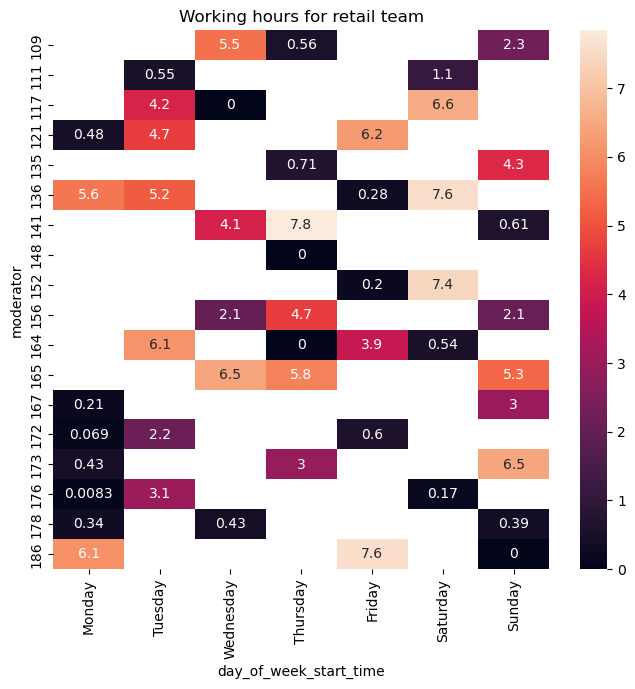

In [47]:
plt.figure( figsize = (8,7))
sns.heatmap(pivot_table_retail, annot=True)
plt.title("Working hours for retail team")
plt.show()

**We can see that the retail team mainly works 2–3 days a week. The length of the working day varies greatly between employees, so we can assume that there are both full-time and hourly workers, or possibly that all work on an hourly basis.**

_Let’s calculate the median of the average number of working hours._

In [48]:
pivot_table_retail[(pivot_table_retail > 1)].mean()

day_of_week_start_time
Monday       5.840278
Tuesday      4.221759
Wednesday    4.534097
Thursday     5.317361
Friday       5.897037
Saturday     5.690764
Sunday       3.904028
dtype: float64

_Let’s look at when requests were received during this week._

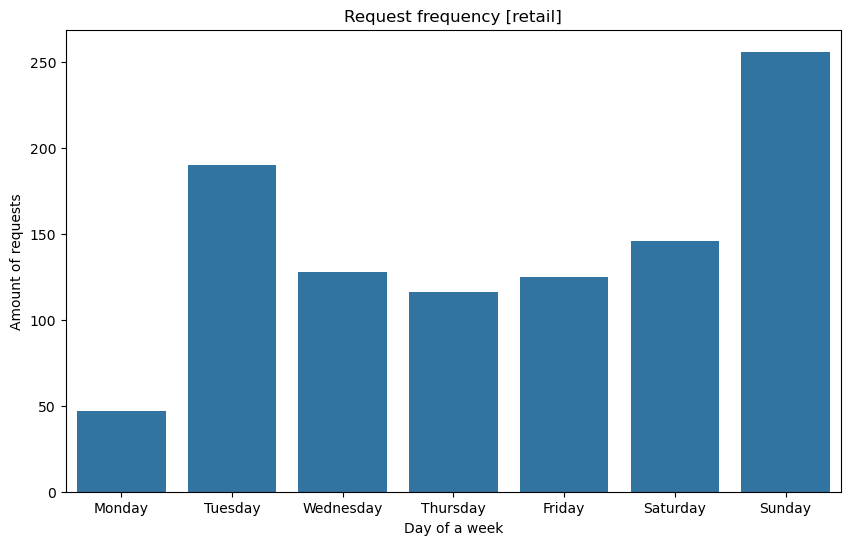

In [49]:
df_q4_filterd_one_week_retail["day_of_week_request"] = df_q4_filterd_one_week_retail["request_time"].dt.day_name()
df_q4_filterd_one_week_retail["day_of_week_request"] = pd.Categorical(
                                                                df_q4_filterd_one_week_retail["day_of_week_request"],
                                                                categories=days_order,
                                                                ordered=True
                                                            )



df_q4_filterd_one_week_retail.groupby('day_of_week_request')['id_request'].count()

plt.figure(figsize = (10,6))
sns.barplot(df_q4_filterd_one_week_retail.groupby('day_of_week_request')['id_request'].count())
plt.xlabel("Day of a week")
plt.ylabel("Amount of requests")
plt.title("Request frequency [retail]")
plt.show()

_We can see that the fewest requests came in on Monday, and the most on Sunday — which corresponds to the number of employees working those days. On Monday only 5 people worked, while on Sunday 8 people were working._

_Let’s check how many requests per person per day we have._

In [50]:
df_q4_filterd_one_week_retail.groupby("day_of_week_request")["id_request"].count().mean()

144.0

In [51]:
df_q4_filterd_one_week_retail.groupby(["moderator" ,"day_of_week_request"])["id_request"].count().mean()

8.0

_We have 145 requests in total, with one person processing an average of 8 requests._  
_Considering the desired KPI, a person should spend 5 + 15 minutes to complete 1 request, with 5 + 45 minutes being acceptable._

**Let’s calculate the number of people needed to process all requests in a full working day scenario.**

_One employee should process 7*60 / 20 = 21 requests — this is our KPI._  
_The minimum target is 7*60 / 50 = 8.4 - equests per day._

_Currently, the retail support team is completing the minimum number of requests, despite the fact that most employees work fewer than 8 hours per day._

_At this speed, we would need 145/8=18 people per day to be able to process all orders on the same day they are received._  
_At the moment, there are only 2–6 people working per day, which explains why requests are taken into processing with a delay._

**Recommendation: Increase the number of people per shift to 9, which would allow requests to be taken into processing within 5 minutes of receipt.**  
_It is also important to note that there is no night shift, so all requests received before 7 AM cannot technically be processed on time._

**Let’s see what percentage of requests were completed on a different day than they were created.**

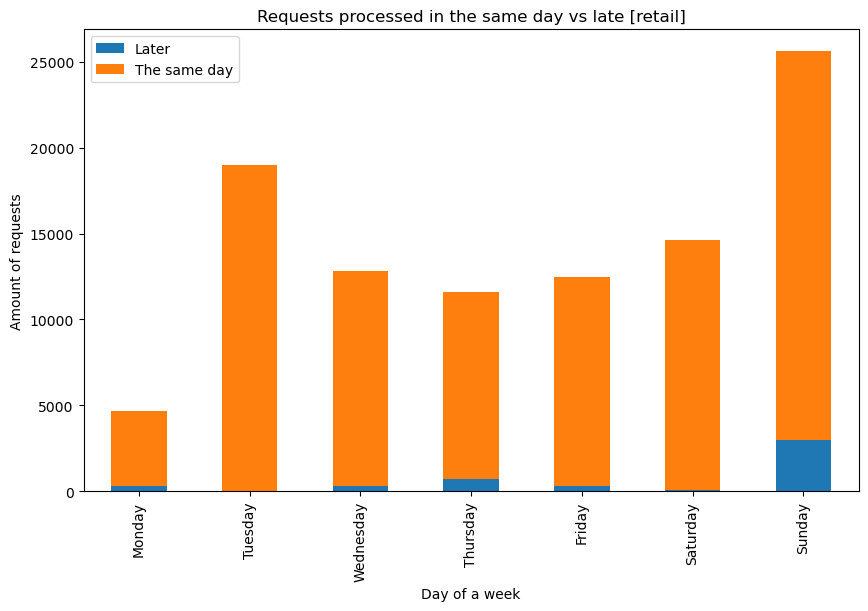

In [52]:
df_q4_filterd_one_week_retail["same_day_processed"] = (
    df_q4_filterd_one_week_retail["request_time"].dt.date == 
    df_q4_filterd_one_week_retail["start_time"].dt.date
)

summary_by_day = df_q4_filterd_one_week_retail.groupby("day_of_week_request")["same_day_processed"].value_counts().unstack().fillna(0) * 100

days_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
summary_by_day = summary_by_day.reindex(days_order)


summary_by_day.plot(kind='bar', stacked=True, figsize=(10,6))
plt.xlabel("Day of a week")
plt.ylabel("Amount of requests")
plt.title("Requests processed in the same day vs late [retail]")
plt.legend(["Later", "The same day"])
plt.show()

_Let’s check how many requests are created during non-working hours (from 11 PM to 7 AM)._

In [53]:
df_q4_filterd_one_week_retail["within_working_hours"] = np.where(
    (df_q4_filterd_one_week_retail["request_time"].dt.hour >= 7) & 
    (df_q4_filterd_one_week_retail["request_time"].dt.hour < 22), 
    1, 
    0
)

In [54]:
df_q4_filterd_one_week_retail.groupby(["day_of_week_request","within_working_hours"])["id_request"].count()

day_of_week_request  within_working_hours
Monday               0                         4
                     1                        43
Tuesday              0                        20
                     1                       170
Wednesday            0                         7
                     1                       121
Thursday             0                         8
                     1                       108
Friday               0                         9
                     1                       116
Saturday             0                         4
                     1                       142
Sunday               0                        24
                     1                       232
Name: id_request, dtype: int64

_We can see that the number of night-time requests is not critical, so let’s look at the hours when the most requests are created and processed._

In [55]:
df_q4_filterd_one_week_retail["request_hour"] = df_q4_filterd_one_week_retail["request_time"].dt.hour
df_q4_filterd_one_week_retail["start_hour"] = df_q4_filterd_one_week_retail["start_time"].dt.hour

request_by_hour = df_q4_filterd_one_week_retail["request_hour"].value_counts().sort_index()
start_by_hour = df_q4_filterd_one_week_retail["start_hour"].value_counts().sort_index()

request_create_processing = pd.DataFrame({
    "Create": request_by_hour,
    "Handling": start_by_hour
})
request_create_processing = request_create_processing.reset_index()

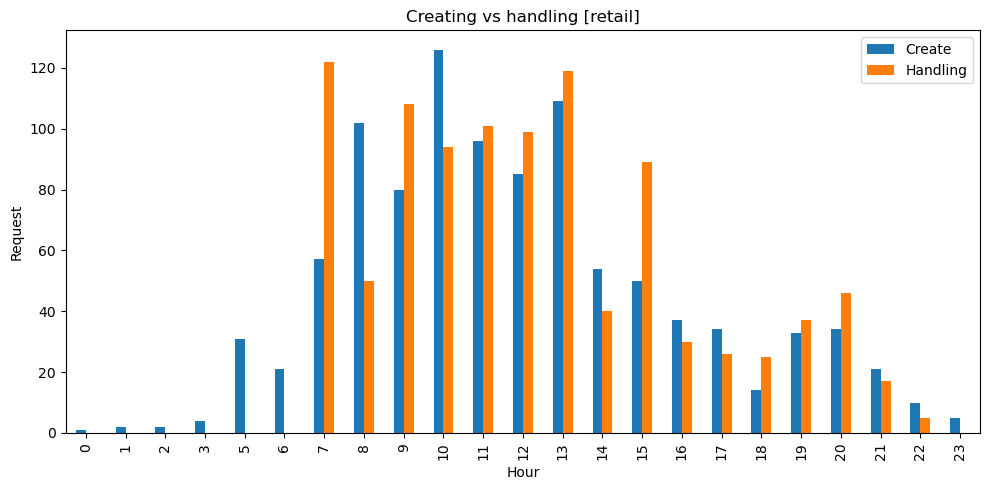

In [56]:
request_create_processing.plot(x = "index", y = ["Create", "Handling"], kind = "bar", stacked=False, figsize = (10,5))
plt.title("Creating vs handling [retail]")
plt.xlabel("Hour")
plt.ylabel("Request")
plt.tight_layout()
plt.show()

_Let’s check whether moderators take requests into processing after they are created, or whether they process requests starting from the earliest created ones._

_We will create a table showing the average time between the moment the request was received and the moment it was taken into processing._

_First, let’s look at the dataset for this week._

In [57]:
df_q4_filterd_one_week_retail.head(10)

,moderator,id_request,request_time,start_time,finish_time,team,time_to_proccess_min,processing_time_min,request_time_year_month,start_time_year_month,week,day_of_week_start_time,day_of_week_request,same_day_processed,within_working_hours,request_hour,start_hour
7732,136,181272,2020-11-16 00:27:47,2020-11-16 07:46:32,2020-11-16 07:47:46,retail,438.750000,1.233333,2020-11,2020-11,47,Monday,Monday,True,0,0,7
7742,136,181303,2020-11-16 05:33:26,2020-11-16 07:31:53,2020-11-16 07:37:32,retail,118.450000,5.650000,2020-11,2020-11,47,Monday,Monday,True,0,5,7
7756,136,181319,2020-11-16 07:15:21,2020-11-16 07:47:48,2020-11-16 07:48:49,retail,32.450000,1.016667,2020-11,2020-11,47,Monday,Monday,True,1,7,7
7757,136,181320,2020-11-16 07:16:16,2020-11-16 07:48:50,2020-11-16 07:49:35,retail,32.566667,0.750000,2020-11,2020-11,47,Monday,Monday,True,1,7,7
7760,136,181326,2020-11-16 07:22:51,2020-11-16 07:27:53,2020-11-16 07:31:51,retail,5.033333,3.966667,2020-11,2020-11,47,Monday,Monday,True,1,7,7
7762,136,181329,2020-11-16 07:39:31,2020-11-16 07:49:36,2020-11-16 07:50:26,retail,10.083333,0.833333,2020-11,2020-11,47,Monday,Monday,True,1,7,7
7763,186,181330,2020-11-16 07:48:26,2020-11-29 19:13:10,2020-11-29 19:15:29,retail,19404.733333,2.316667,2020-11,2020-11,48,Sunday,Monday,False,1,7,19
7764,136,181331,2020-11-16 07:48:31,2020-11-16 07:50:39,2020-11-16 07:51:03,retail,2.133333,0.400000,2020-11,2020-11,47,Monday,Monday,True,1,7,7
7766,172,181334,2020-11-16 07:53:00,2020-11-16 09:01:32,2020-11-16 09:02:48,retail,68.533333,1.266667,2020-11,2020-11,47,Monday,Monday,True,1,7,9
7770,172,181342,2020-11-16 08:31:10,2020-11-16 09:05:41,2020-11-16 09:07:43,retail,34.516667,2.033333,2020-11,2020-11,47,Monday,Monday,True,1,8,9


**We can see that agents begin processing older requests while new ones are coming in, meaning that new requests are not given priority.**

In [58]:
pivot_avg_delay = df_q4_filterd_one_week_retail.pivot_table(
    index="day_of_week_request",
    columns="moderator",
    values="time_to_proccess_min",
    aggfunc="mean"
)

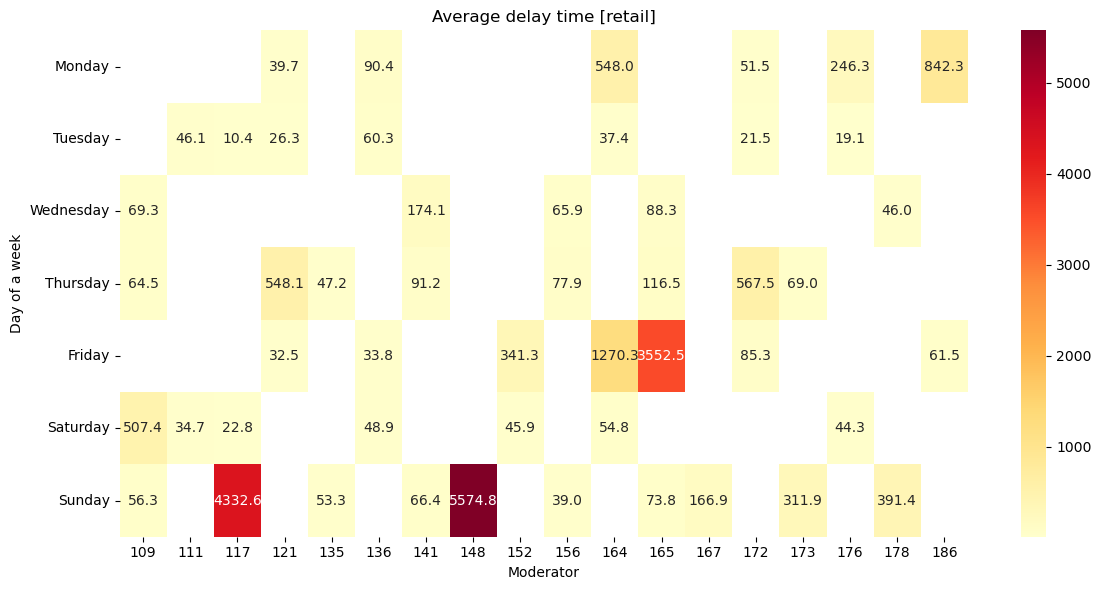

In [59]:
plt.figure(figsize=(12, 6))
sns.heatmap(pivot_avg_delay, annot=True, fmt=".1f", cmap="YlOrRd")

plt.title("Average delay time [retail]")
plt.xlabel("Moderator")
plt.ylabel("Day of a week")
plt.tight_layout()
plt.show()

In [60]:
pivot_cleaned = pivot_avg_delay.mask(pivot_avg_delay > 1000)
avg_delay_by_day_clean = pivot_cleaned.mean(axis=1, skipna=True)
print(avg_delay_by_day_clean)

day_of_week_request
Monday       303.047111
Tuesday       31.592039
Wednesday     88.718472
Thursday     197.738106
Friday       110.895391
Saturday     108.395295
Sunday       144.885879
dtype: float64


_We can see that the average processing time per day is more than an hour, except for Tuesday._  
_The agents who worked on that day processed all requests on the same day, with an average request pick-up time of 31 minutes._  
_At the same time, on Saturday more people were working, but the average pick-up time also increased — even though there were fewer requests than on Tuesday._  
_This means that some agents perform significantly worse than others._

_Finally, let’s look at the distribution of the number of requests per employee._

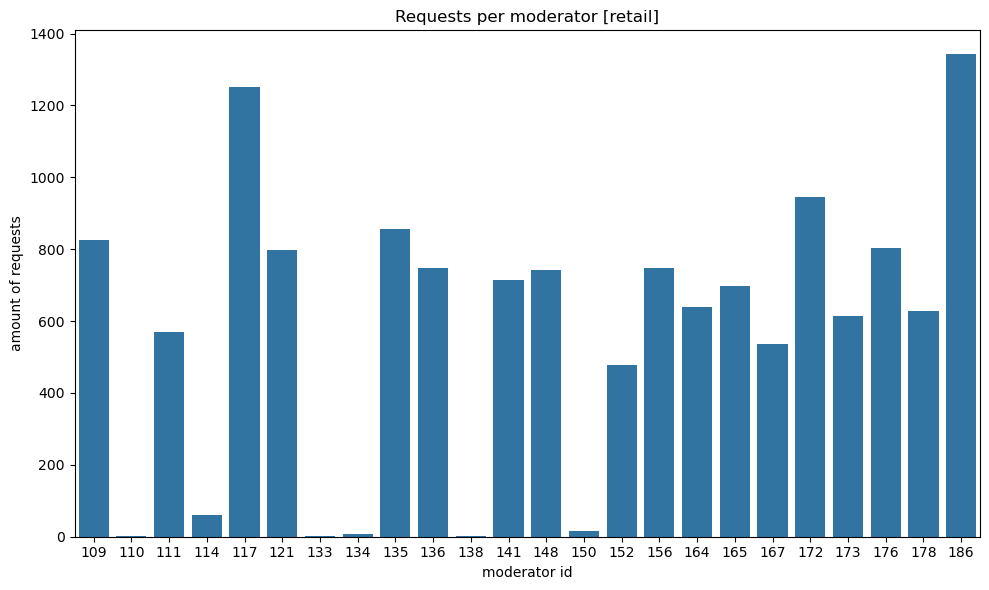

In [61]:
df_retail_requests_per_moderator = df_q4[df_q4['team'] == 'retail'].groupby("moderator")["id_request"].count()

fig, ax = plt.subplots(figsize=(10,6))

sns.barplot(x = df_retail_requests_per_moderator.index, y = df_retail_requests_per_moderator.values)

plt.xlabel("moderator id")
plt.ylabel("amount of requests")
plt.title("Requests per moderator [retail]")
plt.tight_layout()
plt.show()

In [62]:
mask = df_retail_requests_per_moderator < 100
print(df_retail_requests_per_moderator[mask])

moderator
110     1
114    60
133     2
134     8
138     1
150    16
Name: id_request, dtype: int64


_Employees with the fewest requests completed._

In [63]:
mask = df_retail_requests_per_moderator > 1000
df_retail_requests_per_moderator[mask]

moderator
117    1251
186    1342
Name: id_request, dtype: int64

_Employees worth noting — they completed the highest number of requests._  
_According to the Average delay time chart, their request processing time is higher on certain days, which may indicate that these employees are the ones handling delayed requests, in addition to regular ones._

# Wholesale team

_Let’s repeat the same analysis for the wholesale support team._

In [64]:
df_q4_filterd_one_week_wholesale = df_q4.loc[
    (df_q4["request_time"] >= "2020-11-16") &
    (df_q4["request_time"] < "2020-11-23") &
    (df_q4["team"] == "wholesale")
]

df_q4_filterd_one_week_wholesale["day_of_week_start_time"] = df_q4_filterd_one_week_wholesale["start_time"].dt.day_name()


df_q4_filterd_one_week_wholesale["day_of_week_start_time"] = pd.Categorical(
                                                                df_q4_filterd_one_week_wholesale["day_of_week_start_time"],
                                                                categories=days_order,
                                                                ordered=True
                                                            )

start_of_shift_wholesale = df_q4_filterd_one_week_wholesale.groupby(['moderator', 'day_of_week_start_time'])['start_time'].min()
end_of_shift_wholesale = df_q4_filterd_one_week_wholesale.groupby(['moderator', 'day_of_week_start_time'])['start_time'].max()

schedule_wholesale = pd.DataFrame({
    "First request": start_of_shift_wholesale,
    "Last request": end_of_shift_wholesale
})

schedule_wholesale = schedule_wholesale.dropna()

In [65]:
schedule_wholesale["shift_duration_hours"] = (schedule_wholesale["Last request"] - schedule_wholesale["First request"]).dt.total_seconds() / 3600

#delete outlier
threshold = schedule_wholesale.quantile(0.99)
schedule_wholesale = schedule_wholesale[schedule_wholesale <= threshold]

schedule_wholesale = schedule_wholesale.reset_index()

In [66]:
schedule_wholesale.sort_values(by = "day_of_week_start_time")

,moderator,day_of_week_start_time,First request,Last request,shift_duration_hours
0,102,Monday,2020-11-16 12:42:15,2020-11-16 14:55:22,2.218611
17,125,Monday,2020-11-16 20:58:09,2020-11-16 20:58:09,0.000000
24,149,Monday,2020-11-16 10:59:05,2020-11-16 11:03:25,0.072222
15,123,Monday,2020-11-16 07:07:11,2020-11-16 07:51:40,0.741389
27,153,Monday,NaT,2020-11-23 08:06:55,1.075833
11,122,Monday,2020-11-23 07:02:14,2020-11-23 07:02:14,0.000000
7,112,Monday,2020-11-16 07:04:55,2020-11-16 12:39:08,5.570278
30,170,Monday,2020-11-16 07:19:27,2020-11-16 07:52:58,0.558611
38,181,Monday,2020-11-16 08:59:22,2020-11-16 09:01:22,0.033333
41,188,Monday,2020-11-16 15:03:29,2020-11-16 17:17:14,2.229167


In [67]:
pivot_table_wholesale = schedule_wholesale.pivot(
    index="moderator", 
    columns="day_of_week_start_time", 
    values="shift_duration_hours"
)

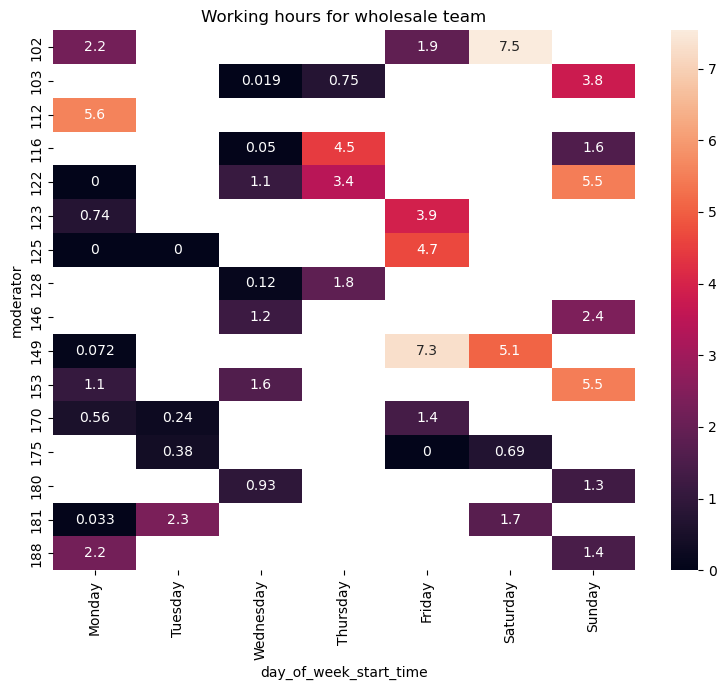

In [68]:
plt.figure( figsize = (8,7))
sns.heatmap(pivot_table_wholesale, annot=True)
plt.title("Working hours for wholesale team")
plt.tight_layout()
plt.show()

_Compared to the retail team, the wholesale team works fewer hours per day, although employees do take requests between 7 AM and 11 PM._

In [69]:
pivot_table_wholesale[(pivot_table_wholesale > 1)].mean()

day_of_week_start_time
Monday       2.773472
Tuesday      2.340278
Wednesday    1.310463
Thursday     3.247500
Friday       3.823056
Saturday     4.775926
Sunday       3.064762
dtype: float64

_We can see that the average working time per week is different from the standard 7–8 hours._

_Let’s see how many requests came in during the week for the team._

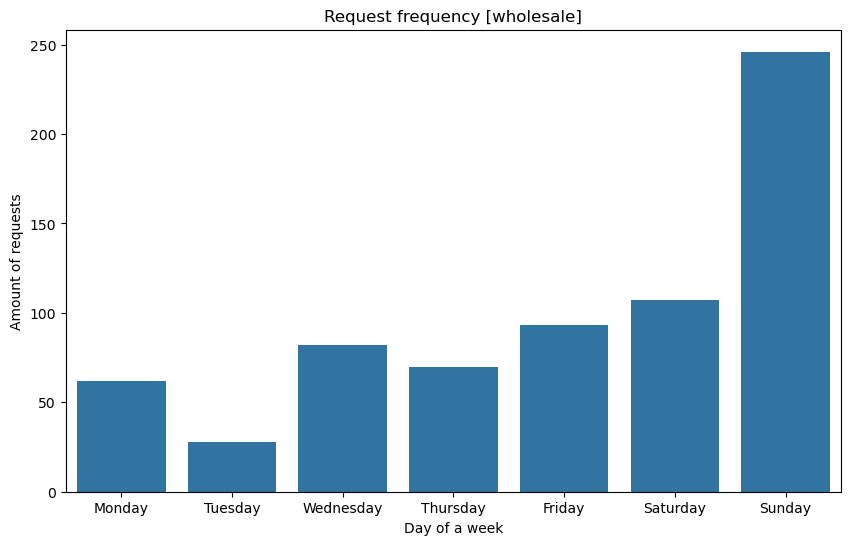

In [70]:
df_q4_filterd_one_week_wholesale["day_of_week_request"] = df_q4_filterd_one_week_wholesale["request_time"].dt.day_name()
df_q4_filterd_one_week_wholesale["day_of_week_request"] = pd.Categorical(
                                                                df_q4_filterd_one_week_wholesale["day_of_week_request"],
                                                                categories=days_order,
                                                                ordered=True
                                                            )

df_q4_filterd_one_week_wholesale.groupby('day_of_week_request')['id_request'].count()

plt.figure(figsize = (10,6))
sns.barplot(df_q4_filterd_one_week_wholesale.groupby('day_of_week_request')['id_request'].count())
plt.xlabel("Day of a week")
plt.ylabel("Amount of requests")
plt.title("Request frequency [wholesale]")
plt.show()

_We can see that the highest number of orders came on Sunday, while during the week the wholesale team’s workload was half that of retail._

_Let’s check the ratio of requests processed on the same day versus those delayed by more than a day._

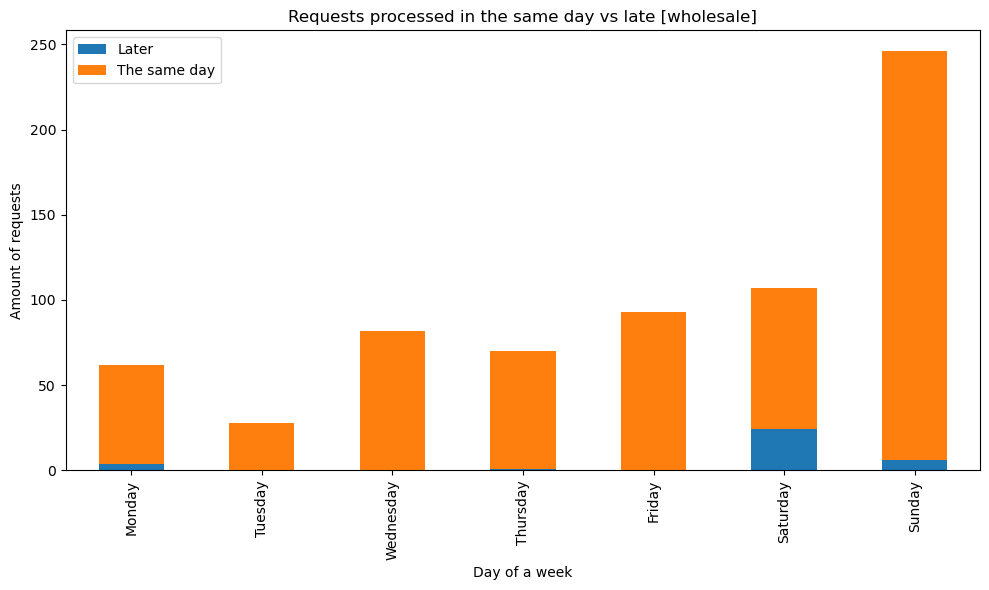

In [71]:
df_q4_filterd_one_week_wholesale["same_day_processed"] = (
    df_q4_filterd_one_week_wholesale["request_time"].dt.date == 
    df_q4_filterd_one_week_wholesale["start_time"].dt.date
)

summary_by_day_wholesale= df_q4_filterd_one_week_wholesale.groupby("day_of_week_request")["same_day_processed"].value_counts().unstack()

days_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
summary_by_day_wholesale = summary_by_day_wholesale.reindex(days_order)


summary_by_day_wholesale.plot(kind='bar', stacked=True, figsize=(10,6))
plt.xlabel("Day of a week")
plt.ylabel("Amount of requests")
plt.title("Requests processed in the same day vs late [wholesale]")
plt.legend(["Later", "The same day"])
plt.tight_layout()
plt.show()

_The chart is not representative, as we know the wholesale team completes 73% of requests one day later than when they were received._

_Let’s create a weekly chart showing the ratio of requests completed on the same day versus later, relative to the total number of requests, to understand why 73% of the wholesale team’s requests are completed with more than a one-day delay._

In [72]:
df_q4_wholesale = df_q4[df["team"] == "wholesale"]

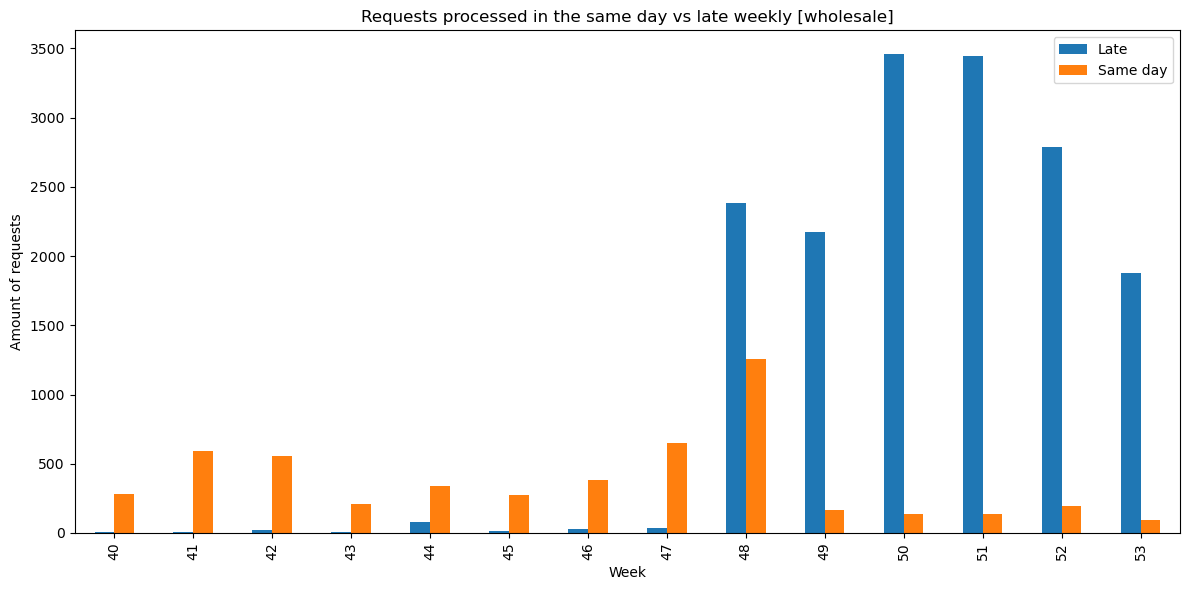

In [73]:
df_q4_wholesale["processed_same_day"] = (
    df_q4_wholesale["request_time"].dt.date == df_q4_wholesale["start_time"].dt.date
)

weekly_processing = df_q4_wholesale.groupby(["week", "processed_same_day"])["id_request"].count().unstack().fillna(0)
weekly_processing.columns = ["Late", "Same day"]


weekly_processing.plot(kind="bar", stacked=False, figsize=(12, 6))
plt.title("Requests processed in the same day vs late weekly [wholesale]")
plt.xlabel("Week")
plt.ylabel("Amount of requests")
plt.tight_layout()
plt.show()

_We can see that with the start of the sales and holiday season, there was record workload on the team. Even though in week 48 the team processed twice as many requests as usual, the number of unprocessed ones was still at a record high._

_The team showed low productivity during peak weeks — even lower than in typical weeks.
This happened because the team first processes older requests, combined with high workload, resulting in 73% of requests being completed late._

_Let’s go back to week 47 and assess the average time to take a request into processing._

In [74]:
pivot_avg_delay = df_q4_filterd_one_week_wholesale.pivot_table(
    index="day_of_week_request",
    columns="moderator",
    values="time_to_proccess_min",
    aggfunc="mean"
)

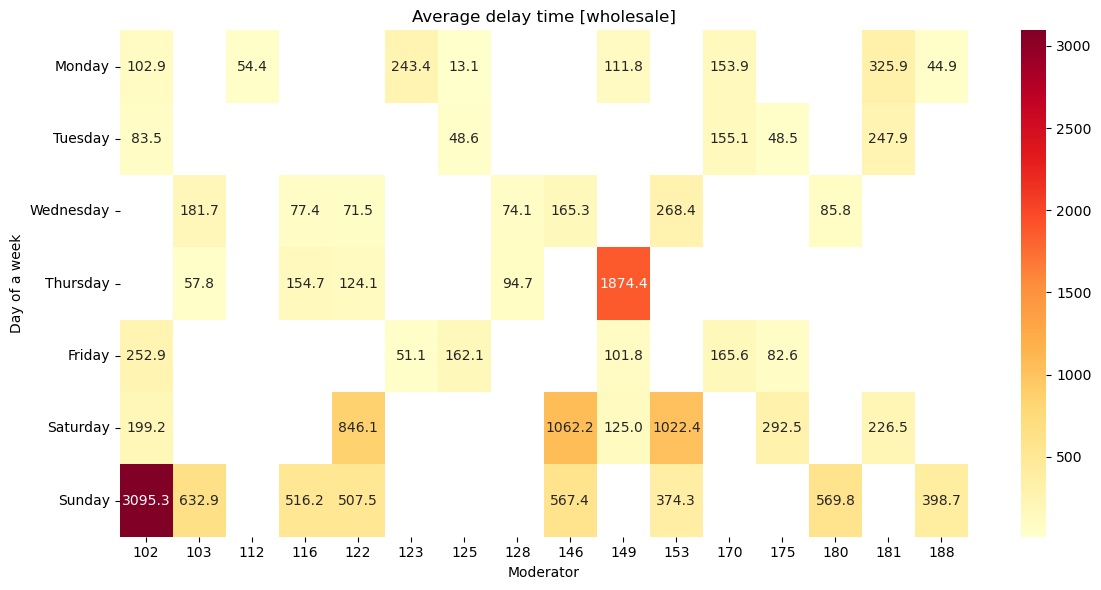

In [75]:
plt.figure(figsize=(12, 6))
sns.heatmap(pivot_avg_delay, annot=True, fmt=".1f", cmap="YlOrRd")

plt.title("Average delay time [wholesale]")
plt.xlabel("Moderator")
plt.ylabel("Day of a week")
plt.tight_layout()
plt.show()

In [76]:
pivot_cleaned = pivot_avg_delay.mask(pivot_avg_delay > 1000)
avg_delay_by_day_clean = pivot_cleaned.mean(axis=1, skipna=True)
print(avg_delay_by_day_clean)

day_of_week_request
Monday       131.269504
Tuesday      116.721520
Wednesday    132.036924
Thursday     107.810952
Friday       136.015320
Saturday     337.863418
Sunday       509.538650
dtype: float64


_We can see that the average time to take a request into processing is at least 20 times longer than the desired KPI._

_Let’s estimate how many employees are needed for fast response times._

In [77]:
df_q4_filterd_one_week_wholesale.groupby("day_of_week_request")["id_request"].count().mean()

98.28571428571429

In [78]:
df_q4_filterd_one_week_wholesale.groupby(["moderator" ,"day_of_week_request"])["id_request"].count().mean()

6.142857142857143

_We have 98 requests, while one person currently handles an average of 6 requests.
According to the desired KPI, an employee should spend 5 minutes (pickup) + 15 minutes (processing) per request.  
An acceptable KPI is 5 minutes (pickup) + 45 minutes (processing)._

_Given a full workday (8 hours – 1 hour lunch = 7 hours of work), an employee should process:_

_KPI target: 7×60 / 20 = 21 requests/day_  
_Minimum acceptable: 7×60 / 50 = 8.4 requests/day_

_At the minimum acceptable speed, we would need:
98 / 8 ≈ 12 employees to process all requests on the same day they arrive._

_Currently, the support team is not even meeting the minimum request volume per person._

_It’s also important to note that there is no night shift, so all requests arriving before 7 AM technically cannot be handled on time._

**Conclusion: hiring new staff is not necessary. Instead, the focus should be shifted so that existing employees work exclusively on request processing — this would make it possible to achieve the desired results (under normal workload).**

_Next, let’s review how many requests each employee processed during the quarter._

Text(0.5, 1.0, 'Requests per moderator [wholesale]')

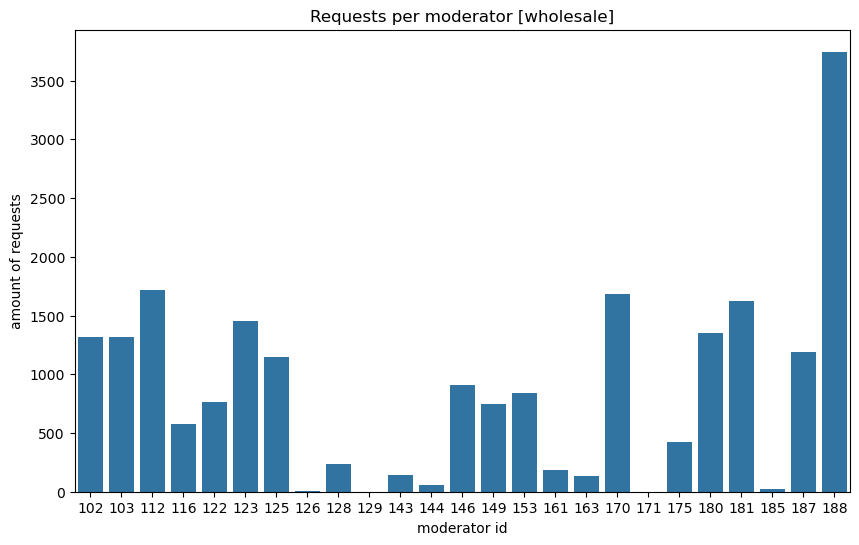

In [79]:
df_retail_wholesale_per_moderator = df[df['team'] == 'wholesale'].groupby("moderator")["id_request"].count()

fig, ax = plt.subplots(figsize=(10,6))

sns.barplot(x = df_retail_wholesale_per_moderator.index, y = df_retail_wholesale_per_moderator.values)

plt.xlabel("moderator id")
plt.ylabel("amount of requests")
plt.title("Requests per moderator [wholesale]")

In [80]:
mask = df_retail_wholesale_per_moderator < 100
df_retail_wholesale_per_moderator[mask]

moderator
126     2
129     1
144    61
171     1
185    25
Name: id_request, dtype: int64

_Special attention should be given to certain moderators who handled a very small number of requests compared to others._

In [81]:
mask = df_retail_wholesale_per_moderator > 2000
df_retail_wholesale_per_moderator[mask]

moderator
188    3746
Name: id_request, dtype: int64

**Overall, the wholesale team’s issue is that they do not spend a full workday on support tasks. It is likely that some employees only switch to this type of work a few times a day, which is the main reason for the team’s low performance.**